## I. Perkenalan

Nama : Fadhilah Amani Alam Aulia

Batch : 15

Dataset : Data Telco Customer Churn

Objective : Memprediksi kategori Churn pada customer

## II. Import Libraries

In [1]:
# Import libraries

import joblib
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from sklearn.metrics import classification_report

## III. Data Loading

In [2]:
# Mengakses dataset

data = pd.read_csv('h8dsft_Milestone1P2_fadhilah_amani_alam_aulia.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Melihat 10 baris pertama pada dataset

data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Melihat 10 baris terakhir pada dataset

data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Menampilkan describe data

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Mengecek ukuran dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Mengubah tipe data 'TotalCharges' dari object menjadi numerik

data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [36]:
 # Mengubah tipe data 'SeniorCitizen' menjadi object

data = data.astype({"SeniorCitizen": object})

In [9]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Berdasarkan data di atas, diketahui bahwa dataset ini terdiri dari 7043 baris dan 21 kolom. Dataset ini terdiri dari tiga tipe data, yaitu float64, int64, dan object, serta memakan memori sebesar 1.1 MB.

## IV. Exploratory Data Analysis

In [11]:
# Menampilkan nilai data unique di setiap kolom

for col in data:
  print(col, data[col].unique())
  print('')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender ['Female' 'Male']

SeniorCitizen [0 1]

Partner ['Yes' 'No']

Dependents ['No' 'Yes']

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService ['No' 'Yes']

MultipleLines ['No phone service' 'No' 'Yes']

InternetService ['DSL' 'Fiber optic' 'No']

OnlineSecurity ['No' 'Yes' 'No internet service']

OnlineBackup ['Yes' 'No' 'No internet service']

DeviceProtection ['No' 'Yes' 'No internet service']

TechSupport ['No' 'Yes' 'No internet service']

StreamingTV ['No' 'Yes' 'No internet service']

StreamingMovies ['No' 'Yes' 'No internet service']

Contract ['Month-to-month' 'One year' 'Two year']

PaperlessBilling ['Yes' 'No']

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'

Berikut ini merupakan penjelasan dari masing-masing kolom pada dataset.
- `customerID`<br>
Merupakan kolom yang berisi ID untuk setiap customer.
- `gender`<br>
Merupakan kolom yang menjelaskan jenis kelamin dari customer.
- `SeniorCitizen`<br>
Merupakan kolom yang menjelaskan apakah customer termasuk kategori lanjut usia atau tidak. Jika bernilai '1' maka customer tersebut termasuk kategori lanjut usia, dan jika bernilai '0' maka customer tersebut bukan customer lanjut usia.
- `Partner`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki pasangan atau tidak.
- `Dependents`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki tanggungan atau tidak.
- `tenure`<br>
Merupakan kolom yang berisi nilai jumlah bulan customer di perusahaan
- `PhoneService`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki layanan telepon atau tidak
- `MultipleLines`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki banyak saluran atau tidak.
- `InternetService`<br>
Merupakan kolom yang menjelaskan provider layanan internet customer.
- `OnlineSecurity`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki keamanan online atau tidak.
- `OnlineBackup`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki backup online atau tidak.
- `DeviceProtection`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki perlindungan pada perangkat atau tidak.
- `TechSupport`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki dukungan teknis atau tidak.
- `StreamingTV`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki  layanan streaming TV atau tidak.
- `StreamingMovies`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki layanan streaming film atau tidak.
- `Contract`<br>
Merupakan kolom yang menjelaskan jangka waktu kontrak pelanggan. Apakah kontraknya dari bulan-ke-bulan, 1 tahun, atau 2 tahun.
- `PaperlessBilling`<br>
Merupakan kolom yang menjelaskan apakah customer memiliki tagihan tanpa kertas (paperless) atau tidak.
- `PaymentMethod`<br>
Merupakan kolom yang menjelaskan metode pembayaran yang dilakukan oleh customer.
- `MonthlyCharges`<br>
Merupakan kolom yang berisi data tagihan yang diberikan kepada customer di setiap bulannya.
- `TotalCharges`<br>
Merupakan kolom yang berisi data total tagihan yang diberikan kepada customer.
- `Churn`<br>
Merupakan kolom yang menjelaskan apakah customer lanjut berlangganan lagi atau tidak.

In [12]:
# Mengubah nilai 'No Phone Service' dan 'No Internet Service' menjadi 'No

data.replace('No internet service', 'No', inplace = True)
data.replace('No phone service', 'No', inplace = True)

In [13]:
# Mengecek kembali nilai data unique pada masing-masing kolom

for col in data:
  print(col, data[col].unique())
  print('')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender ['Female' 'Male']

SeniorCitizen [0 1]

Partner ['Yes' 'No']

Dependents ['No' 'Yes']

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService ['No' 'Yes']

MultipleLines ['No' 'Yes']

InternetService ['DSL' 'Fiber optic' 'No']

OnlineSecurity ['No' 'Yes']

OnlineBackup ['Yes' 'No']

DeviceProtection ['No' 'Yes']

TechSupport ['No' 'Yes']

StreamingTV ['No' 'Yes']

StreamingMovies ['No' 'Yes']

Contract ['Month-to-month' 'One year' 'Two year']

PaperlessBilling ['Yes' 'No']

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.

Pada dataset ini terdapat kolom numerik dan kategorik. Kolom numerik pada dataset ini adalah `tenure`, `MonthlyCharges`, dan `TotalCharges`. Sedangkan kolom kategorik pada dataset ini adalah `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, dan `Churn`.

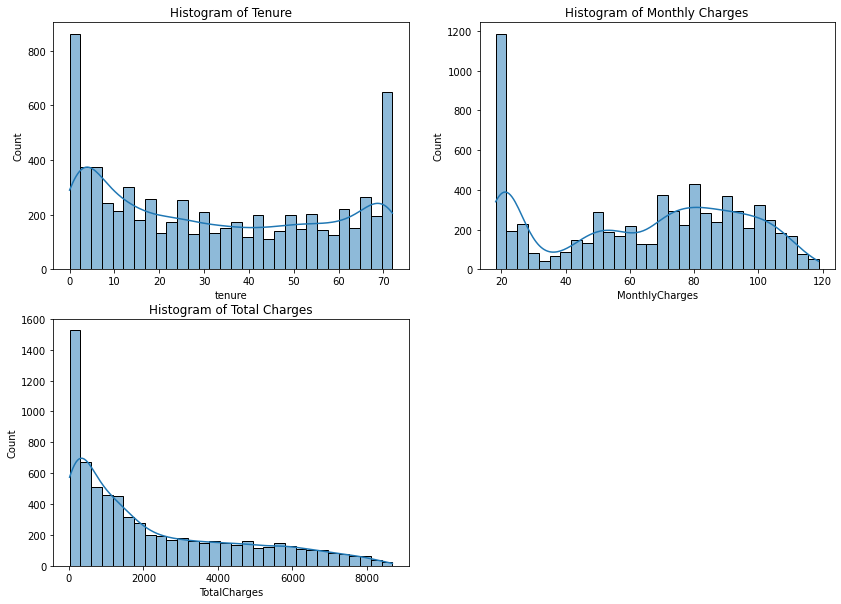

In [14]:
# Visualisasi data untuk kolom numerik

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.histplot(data['tenure'], bins=30, kde=True)
plt.title('Histogram of Tenure')

plt.subplot(2,2,2)
sns.histplot(data['MonthlyCharges'], bins=30, kde=True)
plt.title('Histogram of Monthly Charges')

plt.subplot(2,2,3)
sns.histplot(data['TotalCharges'], bins=30, kde=True)
plt.title('Histogram of Total Charges')

plt.show()

Berdasarkan data grafik histogram di atas, dapat diketahui bahwa data 'tenure' dan 'MonthlyCharges' memiliki dua peak, sedangkan data 'TotalCharges' memiliki data yang terdistribusi secara right-skewed, atau condong ke kanan.

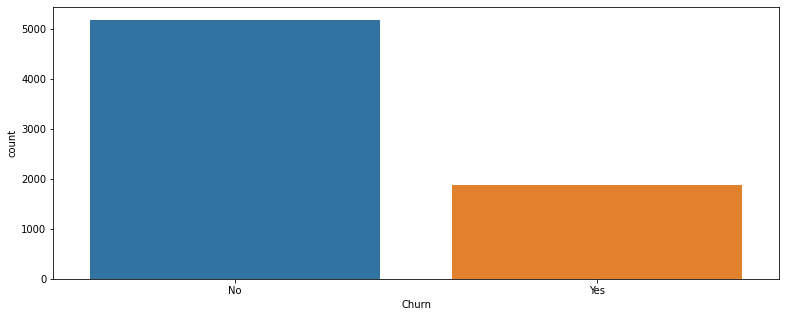

In [15]:
# Visualisasi data untuk kolom kategori

plt.figure(figsize = (13,5))
ax = sns.countplot(x='Churn', data=data)
plt.show()

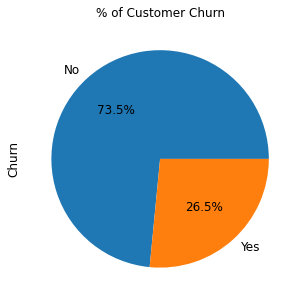

In [16]:
# Visualisasi data pie chart

ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Customer Churn', fontsize = 12)
plt.show()

Berdasarkan grafik di atas, dapat diketahui bahwa jumlah customer yang termasuk kategori No-Churn adalah sebanyak 73.5%(5174 customer), sedangkan untuk jumlah customer yang termasuk kategori Churn adalah sebanyak 26.5%(1869 customer). Maka dapat disimpulkan bahwa dataset ini tidak balance, karena perbandingan antara kategori No-Churn dan Churn adalah 3:1.

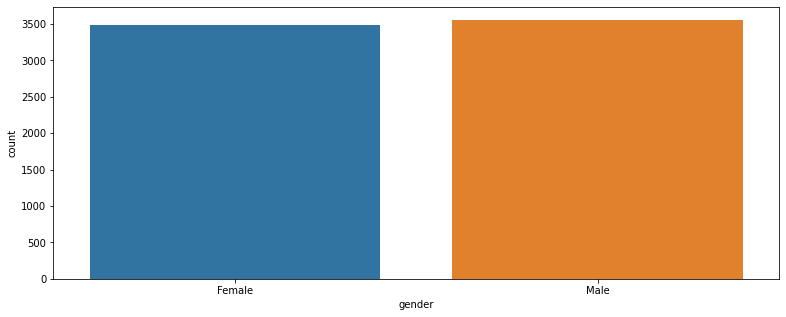

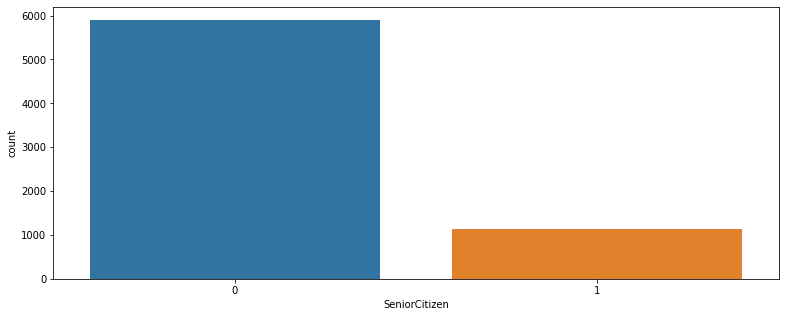

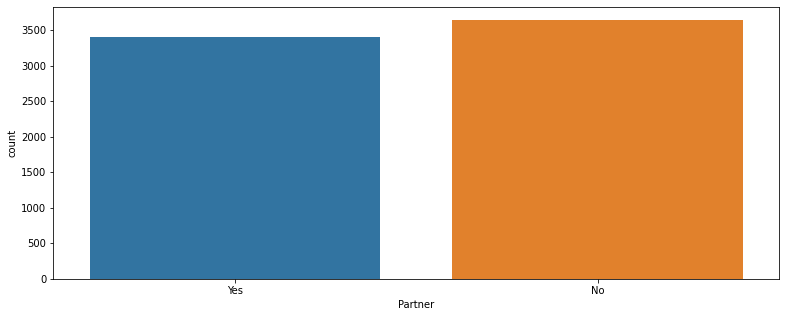

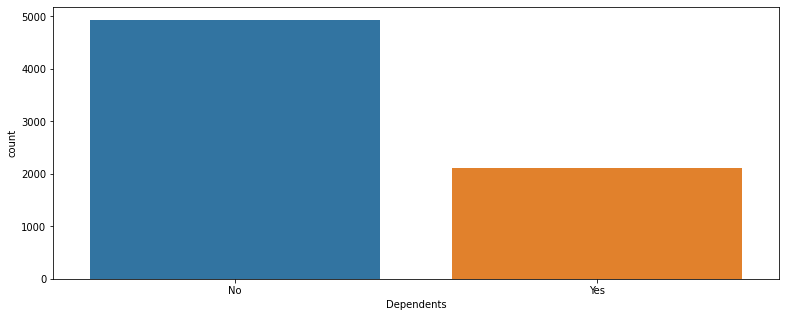

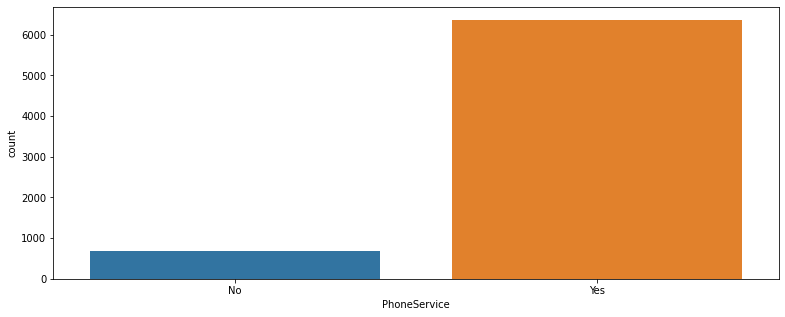

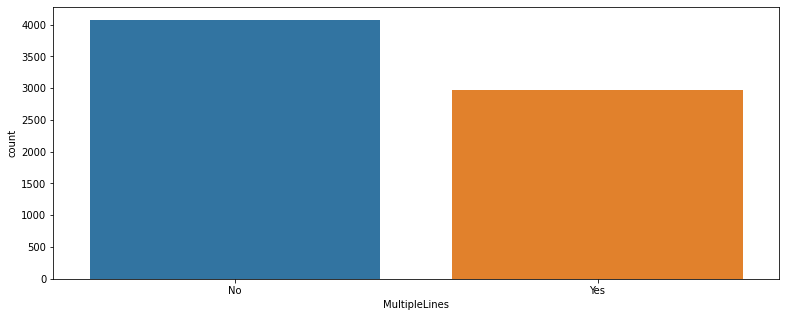

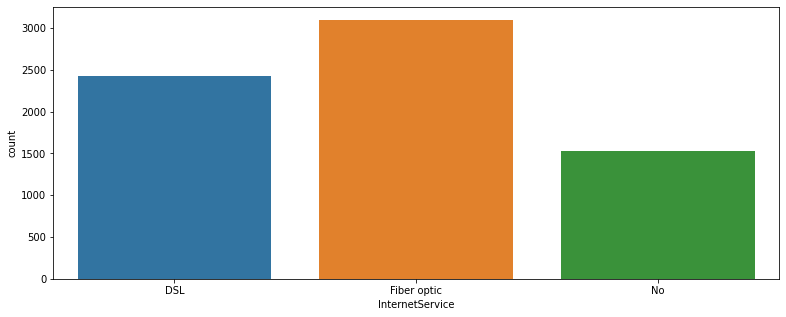

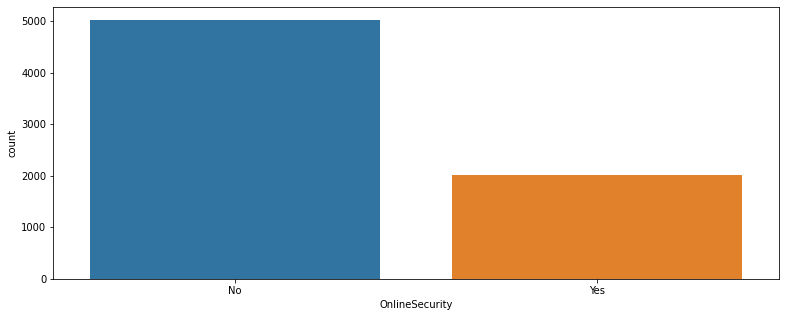

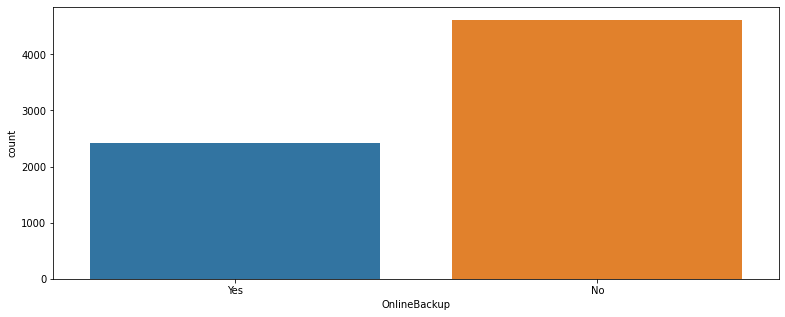

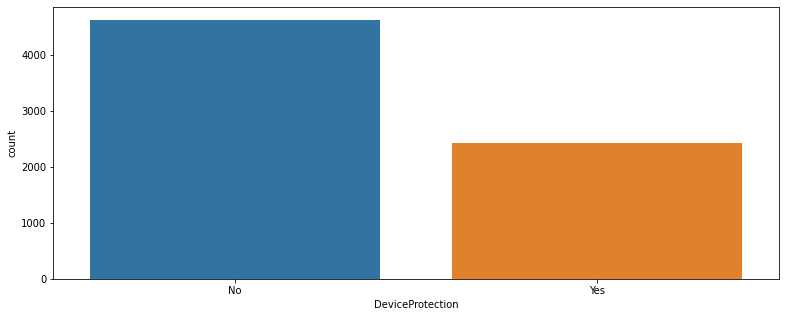

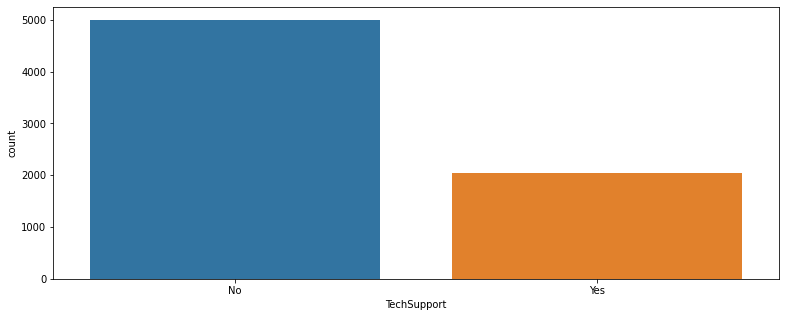

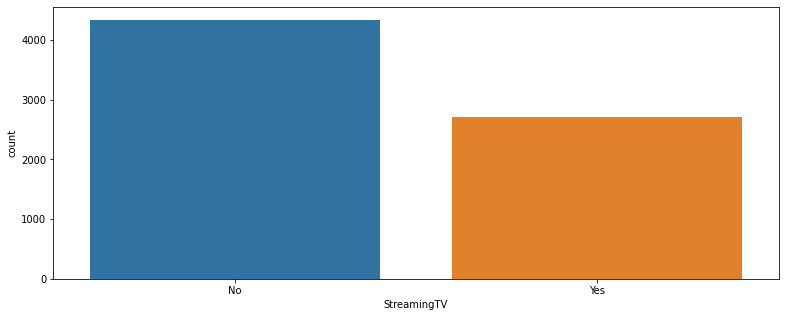

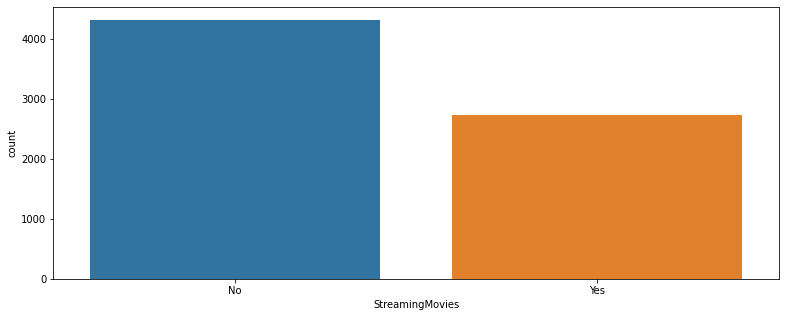

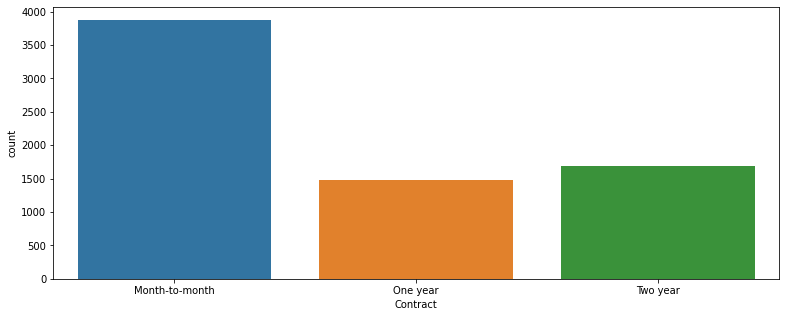

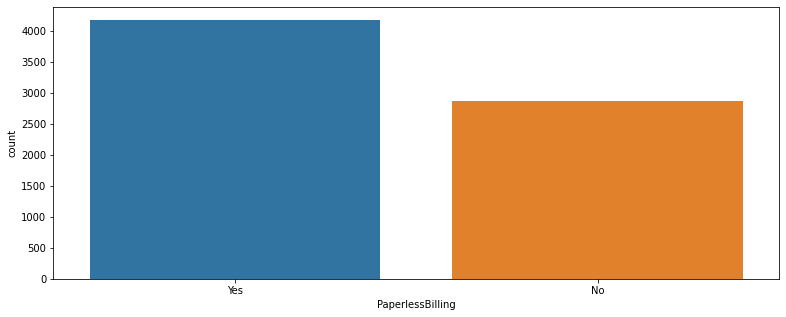

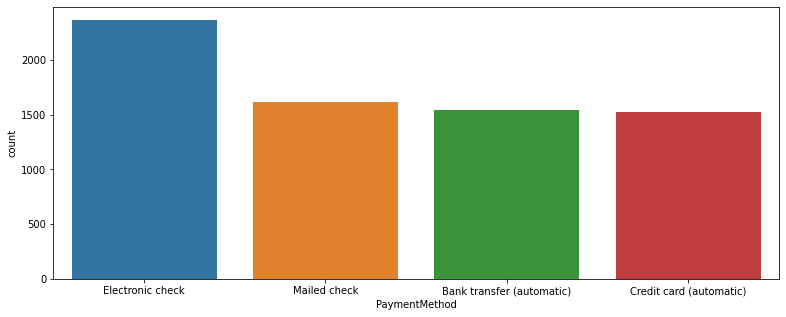

In [17]:
# Membuat fungsi untuk pembuatan countplot

def count_plot(variable,df):
    plt.figure(figsize = (13,5))
    ax = sns.countplot(x=variable, data=df)
    plt.show()

# Membuat grafik countplot

count_plot('gender', data)
count_plot('SeniorCitizen', data)
count_plot('Partner', data)
count_plot('Dependents', data)
count_plot('PhoneService', data)
count_plot('MultipleLines', data)
count_plot('InternetService', data)
count_plot('OnlineSecurity', data)
count_plot('OnlineBackup', data)
count_plot('DeviceProtection', data)
count_plot('TechSupport', data)
count_plot('StreamingTV', data)
count_plot('StreamingMovies', data)
count_plot('Contract', data)
count_plot('PaperlessBilling', data)
count_plot('PaymentMethod', data)

Berdasarkan grafik di atas, dapat diketahui bahwa:
- Data gender customer perempuan dan laki-laki tidak jauh berbeda. 
- Pada data SeniorCitizen, yang paling banyak adalah customer yang tidak lanjut usia. 
- Pada data parner, mayoritas customer telah memiliki pasangan. 
- Pada data dependent, mayoritas customer tidak memiliki tanggungan. 
- Pada data PhoneService, yang paling banyak adalah customer yang memiliki layanan phoneservice
- Pada data multiplelines, yang paling banyak adalah data customer yang 'No' atau tidak memiliki multiplelines
- Pada data InternetService, yang paling banyak adalah customer yang menggunakan fiber optic
- Pada data OnlineSecurity, mayoritas customer tidak menggunakan Onlinesecurity
- Pada data OnlineBackup, mayoritas customer tidak menggunakan OnlineBackup
- Pada data DeviceProtection, mayoritas customer tidak melakukan deviceprotection
- Pada data TechSupport, mayoritas customer tidak menggunakan TechSupport
- Pada data StreamingTV, mayoritas customer tidak menggunakan layanan StreamingTV
- Pada data StreamingMovies, mayoritas customer tidak menggunakan layanan StreamingMovies
- Pada data contract, yang paling banyak adalah data customer yang mempunyai kontrak month-to-month
- Pada data PaperlessBilling, yang paling banyak adalah data customer yang sudah melakukan paperless billing
- Pada data payment method, yang paling banyak digunakan oleh customer adalah Electronic check, atau pembayaran secara online.


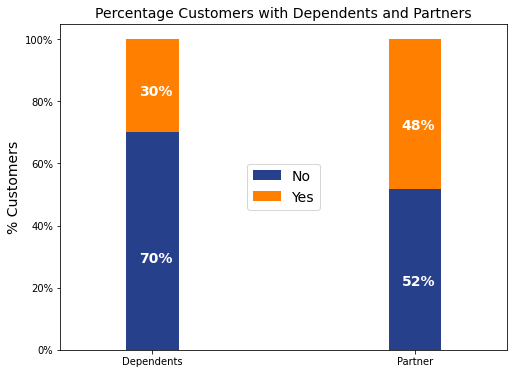

In [18]:
# Visualisasi persentase customer dengan dependents dan partner

dt1 = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
dt2 = dt1.groupby(['variable','value']).count().unstack()
dt2 = dt2*100/len(data)

colors = ['#27408B','#FF8000']
ax = dt2.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Percentage Customers with Dependents and Partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Berdasarkan hasil grafik di atas, dapat diketahui bahwa terdapat 48% customer yang sudah memiliki partner memiliki tanggungan, sedangkan 52% lainnya tidak memiliki tanggungan. Selain itu, 70% dari customer yang tidak mempunyai partner, juga tidak memiliki tanggungan.

In [19]:
# Mengubah data kategorik menjadi numerik untuk pembuatan heatmap

data1 = data.copy()
data1 = data1.apply(LabelEncoder().fit_transform)

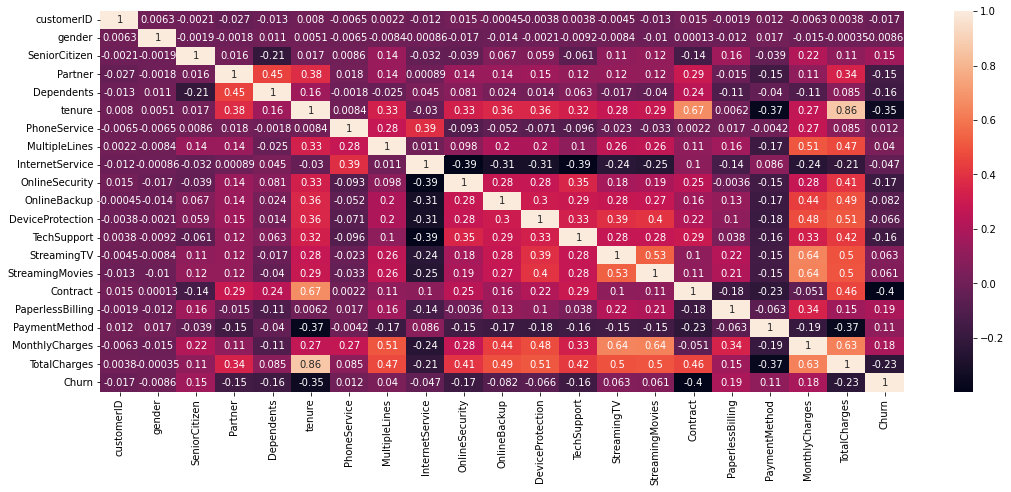

In [20]:
# Pembuatan heatmap untuk melihat korelasi antar variable

plt.figure(figsize = (18, 7))
sns.heatmap(data1.corr(), annot = True)

Berdasarkan heatmap, variable yang memiliki korelasi tinggi dengan 'Churn' adalah :
- Contract, dengan nilai 0.4
- tenure, dengan nilai 0.35
- OnlineSecurity, dengan nilai 0.29
- TechSupport, dengan nilai 0.28
- TotalCharges, dengan nilai 0.23

## V. Data Preprocessing

### V.1 Get Data For Model Inference

In [37]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state=6)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4539,4355-HBJHH,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,79.70,5293.40,Yes
1802,7492-TAFJD,Male,0,Yes,Yes,7,No,No,DSL,Yes,...,Yes,No,No,No,Two year,No,Mailed check,38.55,280.00,No
1380,1131-SUEKT,Male,0,Yes,Yes,61,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),98.45,6145.20,No
5305,9027-TMATR,Female,0,Yes,No,43,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,78.80,3460.30,No
1960,5846-QFDFI,Female,0,Yes,Yes,33,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),88.60,2888.70,No
2902,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90,No
6252,9074-KGVOX,Male,0,Yes,Yes,50,No,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),39.45,2021.35,No
3647,1016-DJTSV,Male,1,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,572.85,No
6410,6121-TNHBO,Female,1,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),83.00,5243.05,No
6812,6563-VNPMN,Female,1,No,No,45,Yes,No,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),85.70,3778.10,No


In [38]:
# Menghapus data inference dari dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [39]:
# Reset index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4355-HBJHH,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,79.70,5293.40,Yes
1,7492-TAFJD,Male,0,Yes,Yes,7,No,No,DSL,Yes,...,Yes,No,No,No,Two year,No,Mailed check,38.55,280.00,No
2,1131-SUEKT,Male,0,Yes,Yes,61,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),98.45,6145.20,No
3,9027-TMATR,Female,0,Yes,No,43,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,78.80,3460.30,No
4,5846-QFDFI,Female,0,Yes,Yes,33,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),88.60,2888.70,No
5,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90,No
6,9074-KGVOX,Male,0,Yes,Yes,50,No,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),39.45,2021.35,No
7,1016-DJTSV,Male,1,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,572.85,No
8,6121-TNHBO,Female,1,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),83.00,5243.05,No
9,6563-VNPMN,Female,1,No,No,45,Yes,No,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),85.70,3778.10,No


### V.2 Splitting Between `X` (Features) and `y` (Target)

In [40]:
# Split between 'X' (features) and 'y' (target)

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7029,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7030,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7031,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [41]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=6)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=6)

print('Train Size :', X_train.shape)
print('Val Size :', X_val.shape)
print('Test Size :', X_test.shape)

Train Size : (5081, 20)
Val Size : (897, 20)
Test Size : (1055, 20)


### V.3 Handling Data Outlier

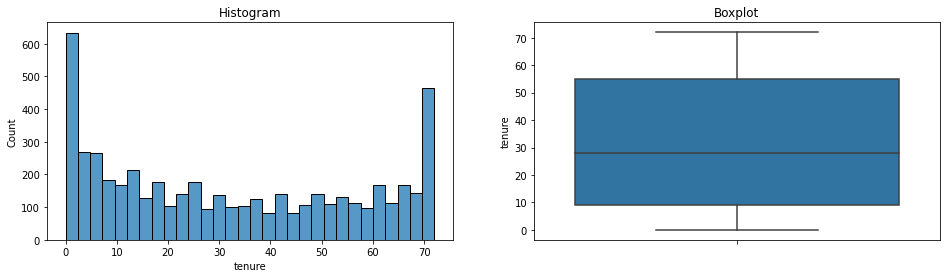


Skewness Value :  0.25093697419465927


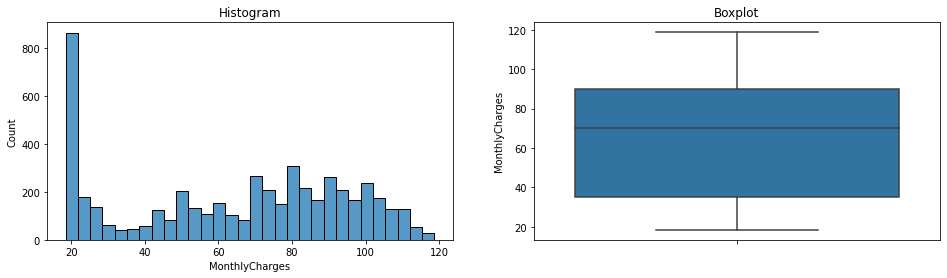


Skewness Value :  -0.2148081743919598


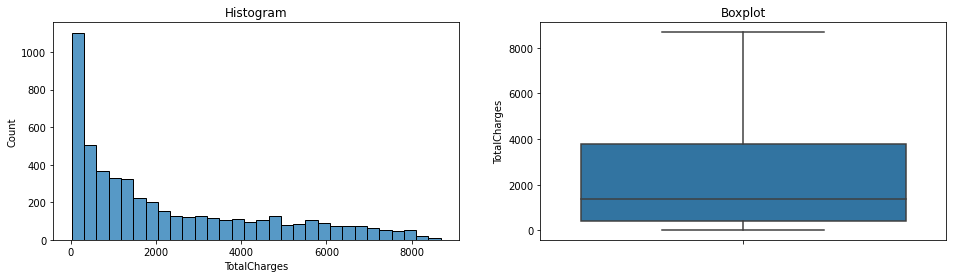


Skewness Value :  0.965559611784982


In [42]:
# Membuat fungsi untuk pembuatan grafik histogram dan boxplot

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Mengecek apakah terdapat data outlier
diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value : ', X_train['tenure'].skew())

diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value : ', X_train['MonthlyCharges'].skew())

diagnostic_plots(X_train, 'TotalCharges')
print('\nSkewness Value : ', X_train['TotalCharges'].skew())

Dari data grafik histogram dan boxplot di atas, diketahui bahwa tidak terdapat data outlier pada dataset ini.

### V.4 Handling Missing Value

In [43]:
# Mengecek missing value pada X_train

X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

In [44]:
# Mengecek missing value pada X_val

X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [45]:
# Check Missing Values on X_test

X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [46]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [47]:
# Check Missing Values on y_val

y_val.isnull().sum()

0

In [48]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

Terdapat missing value pada X_train dan X_test pada dataset ini. Missing value tersebut akan dihandle dengan menggunakan pipeline pada bagian Pipeline.

### V.5 Feature Selection

In [49]:
# Menampilkan data X_train

X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
893,9227-LUNBG,Female,0,No,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,24.60,24.60
4101,9189-JWSHV,Female,1,Yes,No,24,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.55,2264.05
778,3758-CKOQL,Female,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),107.00,6152.30
93,6067-NGCEU,Female,0,No,No,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),111.05,7107.00
5742,3349-ANQNH,Female,1,No,No,59,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,99.50,5890.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0411-EZJZE,Female,0,No,No,3,Yes,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,60.25,170.50
312,1557-EMYVT,Female,0,No,No,43,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.05,4895.10
4627,1820-DJFPH,Female,0,Yes,Yes,72,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),24.05,1709.15
4770,0018-NYROU,Female,0,Yes,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,68.95,351.50


Berdasarkan heatmap pada bagian EDA, variabel yang tidak memiliki korelasi tinggi dengan 'Churn' adalah:
- customerID
- gender
- PhoneService
- MultipleLines
- InternetService
- StreamingTV
- StreamingMovies

Maka kolom-kolom tersebut akan dihapus, karena tidak akan digunakan untuk proses selanjutnya.

In [50]:
# Menghapus kolom-kolom yang tidak digunakan pada X_train, X_val, dan X_test

X_train.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)
X_val.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)
X_test.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies'], axis=1, inplace=True)
X_train

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
893,0,No,No,1,No,No,No,No,Month-to-month,No,Electronic check,24.60,24.60
4101,1,Yes,No,24,No,No,No,No,Month-to-month,Yes,Electronic check,93.55,2264.05
778,0,Yes,No,59,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),107.00,6152.30
93,0,No,No,65,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),111.05,7107.00
5742,1,No,No,59,No,No,Yes,No,One year,Yes,Electronic check,99.50,5890.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0,No,No,3,No,No,No,No,Month-to-month,Yes,Electronic check,60.25,170.50
312,0,No,No,43,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.05,4895.10
4627,0,Yes,Yes,72,No,No,No,No,Two year,Yes,Bank transfer (automatic),24.05,1709.15
4770,0,Yes,No,5,No,No,No,No,Month-to-month,Yes,Electronic check,68.95,351.50


### V.6 Get Numerical Columns and Categorical Columns

In [51]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns:  ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### V.7 Pipeline

In [52]:
# Membuat pipeline sklearn untuk handling missing value, scaling, dan encoding

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [53]:
# Fit dan transform data X_train, X_val, dan X_test dengan pipeline

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(5081, 26)

In [54]:
# Feature Encoding untuk y (target)

labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_val = labelencoder.fit_transform(y_val)
y_test = labelencoder.fit_transform(y_test)

y_train

array([1, 1, 0, ..., 0, 0, 1])

In [55]:
# Melakukan SMOTE untuk data imbalance

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f'Train dataset shape: {Counter(y_train)}')
print(f'Train dataset shape resample: {Counter(y_res)}')

Train dataset shape: Counter({0: 3720, 1: 1361})
Train dataset shape resample: Counter({1: 3720, 0: 3720})


In [56]:
# Membuat Pipeline Tensorflow data train, val, dan test

#Train dataset

train_dataset = tf.data.Dataset.from_tensor_slices((X_res, y_res))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(64)

# Validation dataset

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(64)

# Test dataset

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)

## Sequential API

### VI.1 Model Definition

In [57]:
# Definisi model yang digunakan

model_sequential = Sequential()
model_sequential.add(Dense(14, activation='relu', input_shape=(26,)))
model_sequential.add(Dense(1, activation='sigmoid'))

# Compile

model_sequential.compile(loss ='binary_crossentropy',
                         optimizer = 'sgd',
                         metrics = ['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                378       
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


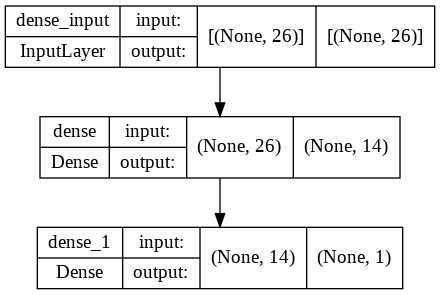

In [58]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

### VI.2 Model Training

In [59]:
# Melakukan model training sequential

%%time
history_seq = model_sequential.fit(train_dataset, epochs=200, validation_data = val_dataset)

Epoch 1/200
117/117 [==============================] - 1s 3ms/step - loss: 0.5900 - accuracy: 0.6952 - val_loss: 0.7285 - val_accuracy: 0.5273
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7382 - val_loss: 0.7127 - val_accuracy: 0.5741
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7528 - val_loss: 0.7041 - val_accuracy: 0.6031
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7605 - val_loss: 0.7006 - val_accuracy: 0.6098
Epoch 5/200
117/117 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7655 - val_loss: 0.6890 - val_accuracy: 0.6198
Epoch 6/200
117/117 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7676 - val_loss: 0.6916 - val_accuracy: 0.6221
Epoch 7/200
117/117 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7684 - val_loss: 0.6882 - val_accuracy: 0.6310

### VI.3 Model Evaluation

In [60]:
# Membuat dataframe untuk hasil history_seq

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.589963,0.695161,0.728457,0.527313
1,0.546211,0.738172,0.712656,0.574136
2,0.517390,0.752823,0.704079,0.603122
3,0.500300,0.760484,0.700607,0.609810
4,0.491042,0.765457,0.688990,0.619844
...,...,...,...,...
195,0.446032,0.791263,0.675072,0.666667
196,0.445558,0.791667,0.679982,0.666667
197,0.445676,0.791801,0.679596,0.666667
198,0.444729,0.793011,0.679462,0.665552


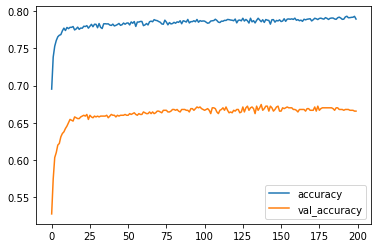

In [61]:
# Grafik data antara accuracy dan val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

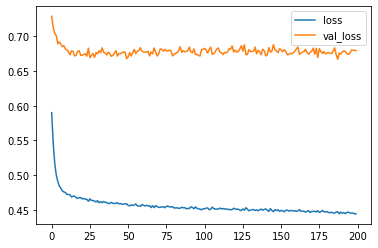

In [62]:
# Grafik data antara loss dan val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [63]:
# Evaluasi pada test dataset
print("Evaluasi pada test dataset")
result = model_sequential.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')

Evaluasi pada test dataset
17/17 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.6464
Test - Loss     :  0.6990572810173035
Test - Accuracy :  0.6464455127716064



In [64]:
# Classification report untuk model sequential

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
y_pred_seq

print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.94      0.56      0.70       787
           1       0.41      0.89      0.56       268

    accuracy                           0.65      1055
   macro avg       0.67      0.73      0.63      1055
weighted avg       0.80      0.65      0.67      1055



Berdasarkan hasil classificaition report, dapat diketahui bahwa:
- Model memiliki tingkat akurasi 65%
- Berdasarkan score recall, model berhasil memprediksi 56% data pada kelas 0, yaitu kategori 'No' pada Churn dengan benar. Tetapi sebanyak 44% salah prediksi. Data yang seharusnya masuk ke kelas 0, diprediksi oleh model masuk ke kelas 1, yaitu kategori 'Yes' pada Churn.
- Selain itu model berhasil memprediksi 89% data pada kelas 1, yaitu kategori 'Yes' pada Churn dengan benar. Tetapi sebanyak 11% salah prediksi. Data yang seharusnya masuk ke kelas 1, diprediksi oleh model masuk ke kelas 0, yaitu kategori 'No' pada Churn.

---
### Model Improvement

In [118]:
# Definisi model yang digunakan

model_sequential1 = Sequential()
model_sequential1.add(Dense(14, activation='relu', input_shape=(26,)))
model_sequential1.add(Dense(1, activation='sigmoid'))

# Compile

model_sequential1.compile(loss ='binary_crossentropy',
                         optimizer = 'adam',
                         metrics = ['accuracy'])

model_sequential1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 14)                378       
                                                                 
 dense_9 (Dense)             (None, 1)                 15        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


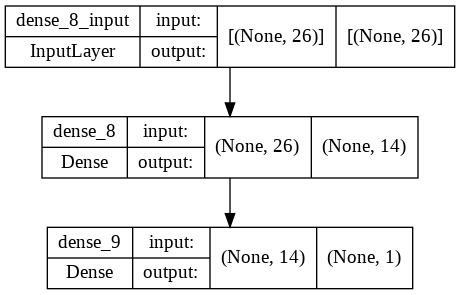

In [119]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential1, show_shapes=True)

In [120]:
# Train the model

%%time
history_seq1= model_sequential1.fit(train_dataset, epochs=200, validation_data = val_dataset)

Epoch 1/200
117/117 [==============================] - 1s 3ms/step - loss: 0.6387 - accuracy: 0.6427 - val_loss: 0.7818 - val_accuracy: 0.4972
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7116 - val_loss: 0.6905 - val_accuracy: 0.6132
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7398 - val_loss: 0.6640 - val_accuracy: 0.6332
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7495 - val_loss: 0.6501 - val_accuracy: 0.6455
Epoch 5/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7478 - val_loss: 0.6311 - val_accuracy: 0.6656
Epoch 6/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7501 - val_loss: 0.6257 - val_accuracy: 0.6734
Epoch 7/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7520 - val_loss: 0.6124 - val_accuracy: 0.6789

In [121]:
# Create Dataframe

history_seq1_df = pd.DataFrame(history_seq1.history)
history_seq1_df

,loss,accuracy,val_loss,val_accuracy
0,0.638656,0.642742,0.781822,0.497213
1,0.568251,0.711559,0.690513,0.613155
2,0.527131,0.739785,0.664007,0.633222
3,0.516114,0.749462,0.650124,0.645485
4,0.511584,0.747849,0.631148,0.665552
...,...,...,...,...
195,0.452272,0.788441,0.554278,0.701226
196,0.451618,0.788710,0.552832,0.703456
197,0.451345,0.790323,0.553948,0.705686
198,0.451247,0.787903,0.555844,0.704571


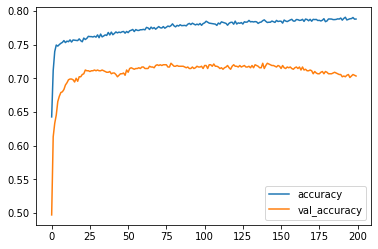

In [122]:
# Plot between Accuracy and val_accuracy

history_seq1_df[['accuracy', 'val_accuracy']].plot()

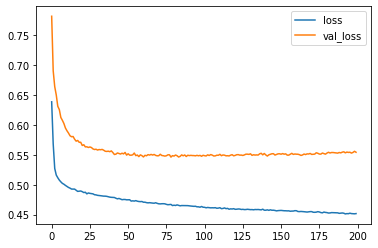

In [123]:
# Plot between loss and val_loss

history_seq1_df[['loss', 'val_loss']].plot()

In [126]:
# Evaluate on a dataset.
# Evaluasi pada test dataset
print("Evaluasi pada test dataset")
result = model_sequential.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')
print("\nEvaluate on test data")
result = model_sequential1.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')

Evaluasi pada test dataset
17/17 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.6464
Test - Loss     :  0.6990572810173035
Test - Accuracy :  0.6464455127716064


Evaluate on test data
17/17 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7137
Test - Loss     :  0.5564447045326233
Test - Accuracy :  0.7137441039085388



In [127]:
# Classification report untuk model sequential improvement

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
y_pred_seq

print(classification_report(y_test, y_pred_seq))

print('\n----------------Setelah Model Improvement----------------')
print(' ')

y_pred_seq1 = model_sequential1.predict(X_test)
y_pred_seq1 = np.where(y_pred_seq1 >= 0.5, 1, 0)
y_pred_seq1

print(classification_report(y_test, y_pred_seq1))

              precision    recall  f1-score   support

           0       0.94      0.56      0.70       787
           1       0.41      0.89      0.56       268

    accuracy                           0.65      1055
   macro avg       0.67      0.73      0.63      1055
weighted avg       0.80      0.65      0.67      1055


----------------Setelah Model Improvement----------------
 
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       787
           1       0.46      0.84      0.60       268

    accuracy                           0.71      1055
   macro avg       0.69      0.75      0.69      1055
weighted avg       0.81      0.71      0.73      1055



Setelah dilakukannya improvement pada model dengan mengubah optimizer dari 'sgd' menjadi 'adam', dapat diketahui bahwa:
- Model mengalami kenaikan akurasi sebesar 6%, dari 65% menjadi 71% dan f1-score mengalami kenaikan.
- Berdasarkan score recall, model berhasil memprediksi 67% data pada kelas 0, yaitu kategori 'No' pada Churn dengan benar. Tetapi sebanyak 33% salah prediksi. Data yang seharusnya masuk ke kelas 0, diprediksi oleh model masuk ke kelas 1, yaitu kategori 'Yes' pada Churn.
- Selain itu model berhasil memprediksi 84% data pada kelas 1, yaitu kategori 'Yes' pada Churn dengan benar. Tetapi sebanyak 16% salah prediksi. Data yang seharusnya masuk ke kelas 1, diprediksi oleh model masuk ke kelas 0, yaitu kategori 'No' pada Churn.

## Functional API

### VII.1 Model Definition

In [73]:
# Definisi model yang digunakan

input_layer = Input(shape=(26,))
hidden_layer = Dense(14, activation = 'relu')(input_layer)
output_layer = Dense(1, activation = 'sigmoid') (hidden_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Model Compile

model_functional.compile(loss = 'binary_crossentropy',
                         optimizer = 'sgd',
                         metrics = ['accuracy'])

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense_4 (Dense)             (None, 14)                378       
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


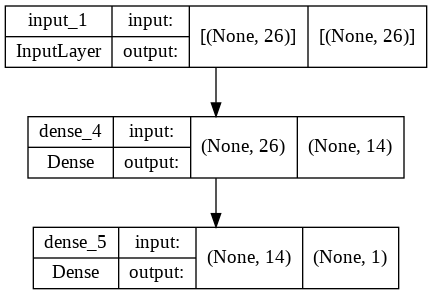

In [74]:
# Plot Model

tf.keras.utils.plot_model(model_functional, show_shapes=True)

### VII.2 Model Training

In [75]:
# Train the model

%%time
history_functional = model_functional.fit(train_dataset, epochs=200, validation_data = val_dataset)

Epoch 1/200
117/117 [==============================] - 1s 3ms/step - loss: 0.7555 - accuracy: 0.4945 - val_loss: 0.8344 - val_accuracy: 0.3155
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.6516 - val_loss: 0.7546 - val_accuracy: 0.4671
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.7196 - val_loss: 0.7180 - val_accuracy: 0.5775
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7493 - val_loss: 0.6973 - val_accuracy: 0.6243
Epoch 5/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7577 - val_loss: 0.6791 - val_accuracy: 0.6522
Epoch 6/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.7594 - val_loss: 0.6705 - val_accuracy: 0.6644
Epoch 7/200
117/117 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7637 - val_loss: 0.6620 - val_accuracy: 0.6734

### VII.3 Model Evaluation


In [76]:
# Create Dataframe

history_functional_df = pd.DataFrame(history_functional.history)
history_functional_df

,loss,accuracy,val_loss,val_accuracy
0,0.755501,0.494489,0.834390,0.315496
1,0.629964,0.651613,0.754563,0.467113
2,0.573237,0.719624,0.718048,0.577480
3,0.539828,0.749328,0.697298,0.624303
4,0.519351,0.757661,0.679073,0.652174
...,...,...,...,...
195,0.444834,0.791263,0.662902,0.668896
196,0.446983,0.790323,0.655798,0.673356
197,0.446349,0.787366,0.656823,0.673356
198,0.446093,0.791129,0.662405,0.671126


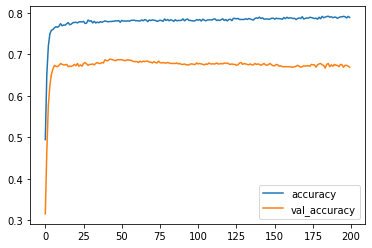

In [77]:
# Plot between Accuracy and val_accuracy

history_functional_df[['accuracy', 'val_accuracy']].plot()

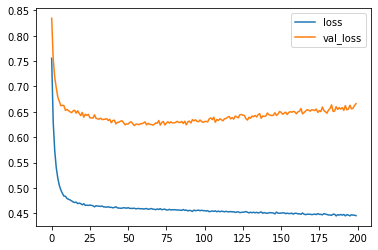

In [78]:
# Plot between loss and val_loss

history_functional_df[['loss', 'val_loss']].plot()

In [79]:
## Evaluate on a dataset.
print("\nEvaluate on test data")
result = model_functional.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
17/17 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6550
Test - Loss     :  0.6814867258071899
Test - Accuracy :  0.6549763083457947



In [80]:
# Model Evaluation using Classification Report

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
y_pred_func

print(classification_report(y_test, y_pred_func))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71       787
           1       0.42      0.90      0.57       268

    accuracy                           0.65      1055
   macro avg       0.68      0.73      0.64      1055
weighted avg       0.81      0.65      0.68      1055



Berdasarkan hasil classification report, dapat diketahui bahwa:
- Model memiliki tingkat akurasi 65%
- Model berhasil memprediksi 57% data pada kelas 0, yaitu kategori 'No' pada Churn dengan benar. Tetapi sebanyak 43% salah prediksi. Data yang seharusnya masuk ke kelas 0, diprediksi oleh model masuk ke kelas 1, yaitu kategori 'Yes' pada Churn.
- Selain itu model berhasil memprediksi 90% data pada kelas 1, yaitu kategori 'Yes' pada Churn dengan benar. Tetapi sebanyak 10% salah prediksi. Data yang seharusnya masuk ke kelas 1, diprediksi oleh model masuk ke kelas 0, yaitu kategori 'No' pada Churn.

---
### Model Improvement

In [138]:
# Definisi model yang digunakan

input_layer = Input(shape=(26,))
hidden_layer = Dense(14, activation = 'relu')(input_layer)
output_layer = Dense(1, activation = 'sigmoid') (hidden_layer)

model_functional1 = Model(inputs=input_layer, outputs=output_layer)

# Model Compile

model_functional1.compile(loss = 'binary_crossentropy',
                         optimizer = 'adam',
                         metrics = ['accuracy'])

model_functional1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense_10 (Dense)            (None, 14)                378       
                                                                 
 dense_11 (Dense)            (None, 1)                 15        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


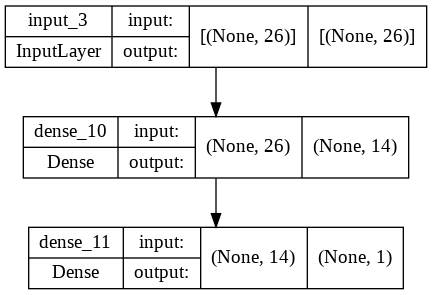

In [139]:
# Plot Model

tf.keras.utils.plot_model(model_functional1, show_shapes=True)

In [140]:
# Train the model

%%time
history_functional1 = model_functional1.fit(train_dataset, epochs=200, validation_data = val_dataset)

Epoch 1/200
117/117 [==============================] - 1s 3ms/step - loss: 0.6020 - accuracy: 0.6762 - val_loss: 0.7231 - val_accuracy: 0.5552
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7181 - val_loss: 0.6524 - val_accuracy: 0.6433
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7386 - val_loss: 0.6355 - val_accuracy: 0.6533
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7465 - val_loss: 0.6295 - val_accuracy: 0.6555
Epoch 5/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7454 - val_loss: 0.6148 - val_accuracy: 0.6644
Epoch 6/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7516 - val_loss: 0.6104 - val_accuracy: 0.6656
Epoch 7/200
117/117 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7535 - val_loss: 0.5986 - val_accuracy: 0.6734

In [142]:
# Create Dataframe

history_functional1_df = pd.DataFrame(history_functional1.history)
history_functional1_df

,loss,accuracy,val_loss,val_accuracy
0,0.602037,0.676210,0.723130,0.555184
1,0.562531,0.718145,0.652447,0.643255
2,0.526568,0.738575,0.635452,0.653289
3,0.515108,0.746505,0.629491,0.655518
4,0.510065,0.745430,0.614815,0.664437
...,...,...,...,...
195,0.449744,0.788172,0.543737,0.713489
196,0.450039,0.788710,0.544602,0.713489
197,0.450276,0.789919,0.547022,0.711260
198,0.449540,0.790188,0.547403,0.712375


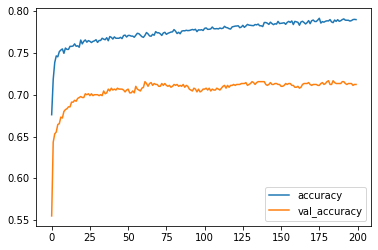

In [143]:
# Plot between Accuracy and val_accuracy

history_functional1_df[['accuracy', 'val_accuracy']].plot()

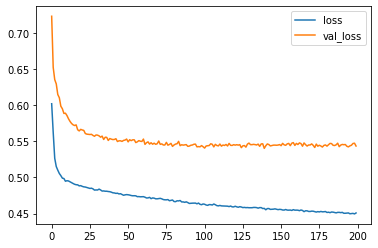

In [144]:
# Plot between loss and val_loss

history_functional1_df[['loss', 'val_loss']].plot()

In [145]:
## Evaluate on a dataset.
print("\nEvaluate on test data")
result = model_functional.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')

print("\nEvaluasi test data setelah improve")
result = model_functional1.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
17/17 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.6550
Test - Loss     :  0.6814867258071899
Test - Accuracy :  0.6549763083457947


Evaluasi test data setelah improve
17/17 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7118
Test - Loss     :  0.5567812919616699
Test - Accuracy :  0.7118483185768127



In [146]:
# Model Evaluation using Classification Report

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
y_pred_func

print(classification_report(y_test, y_pred_func))

print('\n----------------Setelah Model Improvement----------------')
print(' ')

y_pred_func1 = model_functional1.predict(X_test)
y_pred_func1 = np.where(y_pred_func1 >= 0.5, 1, 0)
y_pred_func1

print(classification_report(y_test, y_pred_func1))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71       787
           1       0.42      0.90      0.57       268

    accuracy                           0.65      1055
   macro avg       0.68      0.73      0.64      1055
weighted avg       0.81      0.65      0.68      1055


----------------Setelah Model Improvement----------------
 
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       787
           1       0.46      0.84      0.60       268

    accuracy                           0.71      1055
   macro avg       0.69      0.75      0.69      1055
weighted avg       0.81      0.71      0.73      1055



Setelah dilakukannya improvement pada model dengan mengubah optimizer dari 'sgd' menjadi 'adam', dapat diketahui bahwa:
- Model mengalami kenaikan tingkat akurasi sebesar 6%, dari 65% menjadi 71% dan f1-score mengalami kenaikan.
- Model berhasil memprediksi 67% data pada kelas 0, yaitu kategori 'No' pada Churn dengan benar. Tetapi sebanyak 33% salah prediksi. Data yang seharusnya masuk ke kelas 0, diprediksi oleh model masuk ke kelas 1, yaitu kategori 'Yes' pada Churn.
- Selain itu model berhasil memprediksi 84% data pada kelas 1, yaitu kategori 'Yes' pada Churn dengan benar. Tetapi sebanyak 16% salah prediksi. Data yang seharusnya masuk ke kelas 1, diprediksi oleh model masuk ke kelas 0, yaitu kategori 'No' pada Churn.

Berdasarkan hasil pengujian model, model yang memberikan hasil lebih baik adalah model sequential improvement. Maka model sequential improvement akan digunakan untuk model inference.

In [128]:
# freeze model 

model_sequential1.trainable = False

In [129]:
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                378       
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 393
Trainable params: 0
Non-trainable params: 393
_________________________________________________________________


## VIII. Model Saving

In [130]:
# Save file untuk data inference

model_sequential1.save('churn_model')

! zip -r churn_model.zip churn_model
    
with open('final_pipeline.pkl', 'wb') as file_1:
    joblib.dump(final_pipeline, file_1)

updating: churn_model/ (stored 0%)
updating: churn_model/variables/ (stored 0%)
updating: churn_model/variables/variables.index (deflated 60%)
updating: churn_model/variables/variables.data-00000-of-00001 (deflated 38%)
updating: churn_model/keras_metadata.pb (deflated 84%)
updating: churn_model/saved_model.pb (deflated 87%)
updating: churn_model/assets/ (stored 0%)


## IX. Model Inference

In [131]:
# Mengakses file yang telah di-save untuk data inference

with open('final_pipeline.pkl', 'rb') as file_1:
    final_pipeline = joblib.load(file_1)

In [132]:
# Menampilkan data inference-set

data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4355-HBJHH,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,79.70,5293.40,Yes
1,7492-TAFJD,Male,0,Yes,Yes,7,No,No,DSL,Yes,...,Yes,No,No,No,Two year,No,Mailed check,38.55,280.00,No
2,1131-SUEKT,Male,0,Yes,Yes,61,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),98.45,6145.20,No
3,9027-TMATR,Female,0,Yes,No,43,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,78.80,3460.30,No
4,5846-QFDFI,Female,0,Yes,Yes,33,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),88.60,2888.70,No
5,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90,No
6,9074-KGVOX,Male,0,Yes,Yes,50,No,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),39.45,2021.35,No
7,1016-DJTSV,Male,1,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,572.85,No
8,6121-TNHBO,Female,1,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),83.00,5243.05,No
9,6563-VNPMN,Female,1,No,No,45,Yes,No,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),85.70,3778.10,No


In [133]:
# Feature Encoding dan Feature Scaling untuk data inference

data_inf_final = final_pipeline.transform(data_inf)

In [149]:
# Melakukan prediksi

y_pred_inf = model_sequential1.predict(data_inf_final)
y_pred_inf

array([[0.03415966],
       [0.03493062],
       [0.33612576],
       [0.14781547],
       [0.37945974],
       [0.868727  ],
       [0.15768722],
       [0.9495857 ],
       [0.06945673],
       [0.27733266]], dtype=float32)

In [150]:
# Mengubah hasil prediksi sesuai dengan kategori kelas

y_pred = []

for val in y_pred_inf:
    if val >= 0.5:
        y_pred.append('Yes')
    else:
        y_pred.append('No')

y_pred[:10]

['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No']

In [151]:
# Membuat dataframe hasil prediksi Sequential API

y_pred_inf_df = pd.DataFrame(y_pred, columns= ['Churn Prediction'])
y_pred_inf_df

,Churn Prediction
0,No
1,No
2,No
3,No
4,No
5,Yes
6,No
7,Yes
8,No
9,No


In [152]:
# Menggabungkan data inference-set dengan default payment prediction

df_akhir = pd.concat([data_inf, y_pred_inf_df], axis=1)
df_akhir

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Prediction
0,4355-HBJHH,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Two year,Yes,Electronic check,79.70,5293.40,Yes,No
1,7492-TAFJD,Male,0,Yes,Yes,7,No,No,DSL,Yes,...,No,No,No,Two year,No,Mailed check,38.55,280.00,No,No
2,1131-SUEKT,Male,0,Yes,Yes,61,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),98.45,6145.20,No,No
3,9027-TMATR,Female,0,Yes,No,43,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,78.80,3460.30,No,No
4,5846-QFDFI,Female,0,Yes,Yes,33,Yes,Yes,Fiber optic,No,...,Yes,No,No,Month-to-month,No,Credit card (automatic),88.60,2888.70,No,No
5,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.90,No,Yes
6,9074-KGVOX,Male,0,Yes,Yes,50,No,No,DSL,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),39.45,2021.35,No,No
7,1016-DJTSV,Male,1,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.70,572.85,No,Yes
8,6121-TNHBO,Female,1,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,No,One year,No,Bank transfer (automatic),83.00,5243.05,No,No
9,6563-VNPMN,Female,1,No,No,45,Yes,No,Fiber optic,Yes,...,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),85.70,3778.10,No,No


## X. Pengambilan Kesimpulan

Berdasarkan data di atas, maka dapat disimpulkan bahwa:
- Dataset ini tidak balance, karena jumlah customer yang termasuk kategori No-Churn adalah sebanyak 5174 customer, sedangkan untuk jumlah customer yang termasuk kategori Churn adalah sebanyak 1869 customer. Maka harus dilakukan handling terlebih dahulu dengan menggunakan SMOTE.
- Variable yang memiliki korelasi tinggi dengan 'Churn' adalah 'Contract', 'tenure', 'OnlineSecurity', 'TechSupport', dan 'TotalCharges'.
- Model yang digunakan pada dataset ini adalah Model Sequential API dan Model Functional API.
- Setelah dilakukan improvement pada Model Sequential API, tingkat akurasi model meningkat sebanyak 6%, dari 65% menjadi 71%. 
- Berdasarkan hasil classification report yang dilakukan, dari 4 model yang digunakan, model terbaik adalah Model Sequential Improvement.
- Berdasarkan hasil pengujian, diketahui terdapat perbedaan antara hasil aktual Churn dengan hasil Prediksi Churn. Dari 10 data yang digunakan terdapat 3 data yang memiliki hasil tidak sesuai dengan nilai aktual. Hal ini dapat disebabkan karena terdapat kesalahan dalam memilih feature yang digunakan dan penentuan optimizer yang digunakan pada model serta parameter lainnya, seperti menggunakan drop out pada model.